In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df= pd.read_csv('train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
income_pop= df.ApplicantIncome
income_pop.shape

(614,)

Let's have a look at the stats of Population (*ApplicantIncome*).

In [4]:
# mean
mean_pop=income_pop.mean()
mean_pop

5403.459283387622

In [5]:
# std dev.
std_pop=income_pop.std()
std_pop

6109.041673387174

In [12]:
median_pop = income_pop.median()
median_pop

3812.5

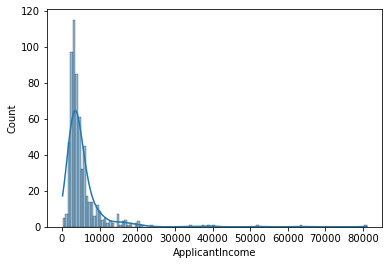

In [6]:
sns.histplot(income_pop, kde=True)
plt.show()

Here we can see that the distribution is not normal and mean = 5403.45, std. dev = 6109.04.

# Central Limit Theorm
The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.

## n=25, we will be taking 300 samples where each sample will contain random 25 people from the whole population everytime.

### Problem Setup
##### lets sample 25 people on their income,create a list of sample mean with n=25  take their mean compare it with a population mean lets see how this compares 

### Create a List of Sample Mean list with n=25, 50, 100, 150, 200

##### Lets create a list sample_mean here lets take 300 samples each of *n* random values with replacement. For each sample, lets calculate the mean of the sample and store all those sample mean values in the list sample_means respectively.

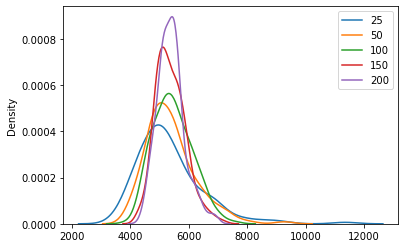

In [7]:
sample_means_list = []
n_best=0
n_list= [25, 50, 100, 150, 200]
skew= []
kurt= []
for n in n_list:
  sample_means_trial=[]
  for sample in range(0, 300):
    sample_values = np.random.choice(income_pop, size=n) 
    sample_mean = np.mean(sample_values)
    sample_means_trial.append(sample_mean)

  sns.kdeplot(sample_means_trial, label=n)
  sample_means_list.append(sample_means_trial)
  skewness=scipy.stats.skew(sample_means_trial)
  skew.append(skewness)
  kurtosis= scipy.stats.kurtosis(sample_means_trial)
  kurt.append(kurtosis)
plt.legend();

So, here we have 5 sample means list. And as per CLT if we choose an appropriate sample size then the sample means approximate a normal distribution.

So, here we have the skewness and kurtosis of the *sample means* and we will go with that smaple_mean that has low skew and kurt.

In [9]:
# let's have a look at the skew list and kurt list
print('skew:',skew)
print('kurt:',kurt)

skew: [1.648218482445727, 1.1582465547989451, 0.38582932493973066, 0.5901312383613396, 0.6577926097285884]
kurt: [4.792232199483437, 2.308726578120716, -0.17635207701170597, 0.44427136934656186, 0.7513447585314599]


So, the 4th sample_means list with n=150 resembles a normal distribution best with lowest skew and kurt.

In [ ]:
means_list_index= (np.abs(skew)+np.abs(kurt)).argmin()
means_list_index

3

In [ ]:
sample_means= sample_means_list[means_list_index]
n= n_list[means_list_index]
len(sample_means)

300

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


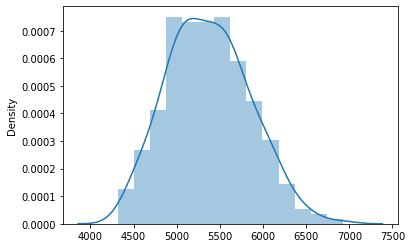

In [ ]:
sns.distplot(sample_means)

Hence we can see the proof of CLT here, i.e. we have taken samples from the Population (Income) and their sample mean form approximately a normal distribution (with proper sample size).

The curve is fairly symmetrical around the central value and the median is roughly equivalent to the mean lets check it.

In [ ]:
# median of sample_mean
median_of_sample_means = np.median(sample_means)
median_of_sample_means

5357.296666666667

In [ ]:
# std of sample_mean
std_sample_mean=np.std(sample_means)
std_sample_mean

476.82377067471833

In [ ]:
# mean of a sample_mean
mean_of_sample_mean = np.mean(sample_means)
mean_of_sample_mean

5370.229466666666

Here we can see, the mean and median values of the sample_mean nearly equal.

let's compare mean of this and a population now

In [ ]:
print(mean_of_sample_mean, mean_pop)

5370.229466666666 5403.459283387622


###### This mean_of_sample_means value is roughly equivalent to our population mean value assigned to the variable mean_pop. Based on the central limit theorem, this will always be the case!

### Equation for Calculating the standard error sampling distribution
##### The standard deviation of sample means is more commonly called the standard error (SE)

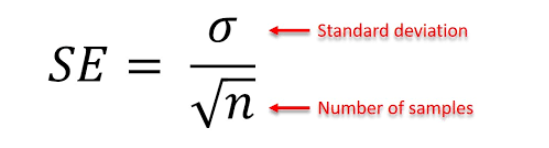

In [ ]:
standard_error = std_pop/np.sqrt(n)
standard_error

498.8011639065622

Here we can see, it is nearly same as the *std_sample_mean* we obtained above.

-------------
*So, we can say that the **sample_means** of the total population (with a proper sample size) is an approximate and normal representation of the whole population.*
-----------------
-----------------

Now let's see, the sample_means if we have taken a lower sample size, let's say 25.

We know one thing that the sample_means will not be as much normal as n=150. But let's see other stats.

## Sample size = 25

In [ ]:
sample_means_25= sample_means_list[0]

In [ ]:
# median of sample_mean
median_of_sample_means_25 = np.median(sample_means_25)
median_of_sample_means_25

5144.02

In [ ]:
# std of sample_mean
std_sample_mean_25=np.std(sample_means_25)
std_sample_mean_25

1208.9647620008782

In [ ]:
# mean of a sample_mean
mean_of_sample_mean_25 = np.mean(sample_means_25)
mean_of_sample_mean_25

5454.4403999999995

In [ ]:
print(mean_of_sample_mean_25, mean_pop)

5454.4403999999995 5403.459283387622


In [ ]:
# let's see the standard error (or std dev of sample) calculated by formula (using population)
standard_error_25 = std_pop/np.sqrt(25) # n=25
standard_error_25

1221.808334677435

**Conclusion**:
The standard error increases if *sample size* is decreased i.e. the distribution of *sample_means* spreads out more.

## Sample size = 200

In [ ]:
sample_means_200= sample_means_list[4]

In [ ]:
# median of sample_mean
median_of_sample_means_200 = np.median(sample_means_200)
median_of_sample_means_200

5356.9575

In [ ]:
# std of sample_mean
std_sample_mean_200=np.std(sample_means_200)
std_sample_mean_200

432.0067622359358

In [ ]:
# mean of a sample_mean
mean_of_sample_mean_200 = np.mean(sample_means_200)
mean_of_sample_mean_200

5399.008916666667

In [ ]:
print(mean_of_sample_mean_200, mean_pop)

5399.008916666667 5403.459283387622


In [ ]:
# let's see the standard error (or std dev of sample) calculated by formula (using population)
standard_error_25 = std_pop/np.sqrt(200) # n=200
standard_error_25

431.9744793803285

**Conclusion**:
The standard error increases if *sample size* is decreased i.e. the distribution of *sample_means* spreads out more.

-------------------
Ideally we want to take larger samples such as n=150 rather than small samples such as n=25.

With more sample size, the new samples_mean have more similar central tendency w.r.t. population, but there is risk of losing normality.

**n=25**: Not much normal, large diff of mean from population

**n=150**: Normal, small diff of mean from population

**n=200**: Less normal, negligible diff of mean from population